In [1]:
import numpy as np
import pandas as pd 

In [2]:
#reading csv file into dataframe
adult_salary = pd.read_csv("adult_salary.csv").iloc[:, 1:]
adult_salary.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#checking if null values exist
adult_salary.info()
#looks like no null values, probably other missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#checking unique values for all text based columns to see if any missing data
set(adult_salary["type_employer"])
#? indicating unknown employers

{'?',
 'Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay'}

In [5]:
#lets remove any data where employer type is unknown
adult_salary = adult_salary[adult_salary["type_employer"] != "?"]

In [6]:
set(adult_salary["education"])
#looks like nothing missing in education

{'10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Preschool',
 'Prof-school',
 'Some-college'}

In [7]:
set(adult_salary["marital"])
#nothing missing in marital status

{'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed'}

In [8]:
set(adult_salary["occupation"])
#looks like some missing occupation details, should definitely drop any data where its a ? as occupation is 
#probably a very important factor in determining income

{'?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

In [9]:
adult_salary = adult_salary[adult_salary["occupation"] != "?"]

In [10]:
set(adult_salary["occupation"])
#relationship column is all set, probably not much of a factor so doesn't matter either way

{'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

In [11]:
set(adult_salary["race"])
#nothing missing here, 'other' might impact model, potentially making this column irrelevant if not a lot of people
#report race, we will check correlations later, and drop if needed

{'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'}

In [12]:
set(adult_salary["sex"])
#all set

{'Female', 'Male'}

In [13]:
set(adult_salary["country"])
#? inidcating misisng country, will drop these datapoints

{'?',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Vietnam',
 'Yugoslavia'}

In [14]:
adult_salary = adult_salary[adult_salary["country"] != "?"]

In [15]:
#lets check if anything missing in target variable
set(adult_salary["income"])

{'<=50K', '>50K'}

In [16]:
#categorical data seems normal, lets hceck for negative values in capital gains/losses, education, hrs per week and
#education num as these numbers should not be negative
print(min(adult_salary["education_num"]) < 0)
print(min(adult_salary["capital_gain"]) < 0)
print(min(adult_salary["capital_loss"]) < 0)
print(min(adult_salary["hr_per_week"]) < 0)
#all false so no negative values, assuming now that data is clean

False
False
False
False


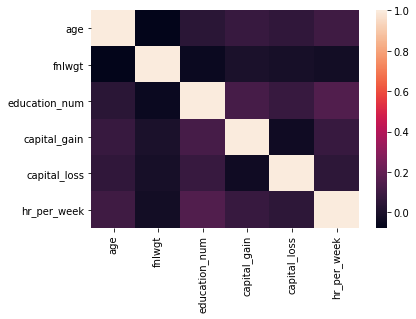

In [152]:
import seaborn as sns
corr = adult_salary.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#heatmap of non categorigcal features, nothing highly correlated to each other, so we should initially use all features 
#for training, and then eliminate some

In [232]:
#lets split into features and target
features, target = adult_salary.iloc[:, :14], adult_salary["income"]

In [233]:
#lets set target variable to 0 if below or equal 50K and 1 if above 50K
target = target.astype('category').cat.codes

In [236]:
features.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country'],
      dtype='object')

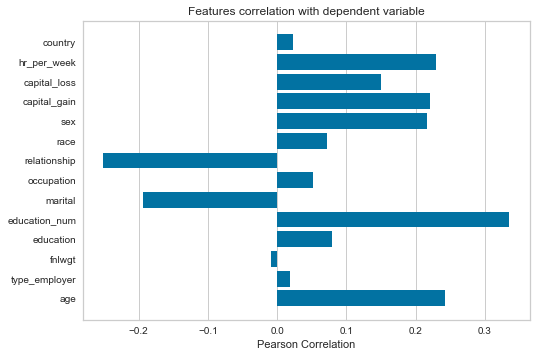

In [237]:
#encoded categorical features for the purpose of this visualization
#feature correlation
from yellowbrick.target import FeatureCorrelation
encoded_features = features.copy()
encoded_features["type_employer"] = encoded_features["type_employer"].astype('category').cat.codes
encoded_features["education"] = encoded_features["education"].astype('category').cat.codes
encoded_features["marital"] = encoded_features["marital"].astype('category').cat.codes
encoded_features["occupation"] = encoded_features["occupation"].astype('category').cat.codes
encoded_features["relationship"] = encoded_features["relationship"].astype('category').cat.codes
encoded_features["race"] = encoded_features["race"].astype('category').cat.codes
encoded_features["sex"] = encoded_features["sex"].astype('category').cat.codes
encoded_features["country"] = encoded_features["country"].astype('category').cat.codes


visualizer = FeatureCorrelation(labels=encoded_features.columns)
visualizer.fit(encoded_features, target)       
visualizer.show()           

In [238]:
#cant judge categorical variables from above visualization, they will be split up below and explained later.
#but age has a very high correlation to income as expected, could be correlated to how much further somoene is in
#their career and could be them making more money at later stages.
#education_num is the most highly correlated indicating people with more secialized education tend to find higher paying
#jobs
#hrs per week is also highly correlated, and is in line with the thinking that a lot of high paying jobs have long hours,
#ex: being an Investment Banker at Goldman Sachs

In [19]:
#lets also encode categorical features, may be a good idea to one hot encode, so every instance in a feature
#has its own column with a true or false, so models don't inappropriately assign weights
features = pd.get_dummies(features, columns=["type_employer", "education", "marital", "occupation", "relationship"
                                 , "race", "sex", "country"], prefix=["employer", "education", "marital", "occupation", "relationship"
                                 , "race", "sex", "country"])
features.head()
#to do

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week,employer_Federal-gov,employer_Local-gov,employer_Private,employer_Self-emp-inc,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


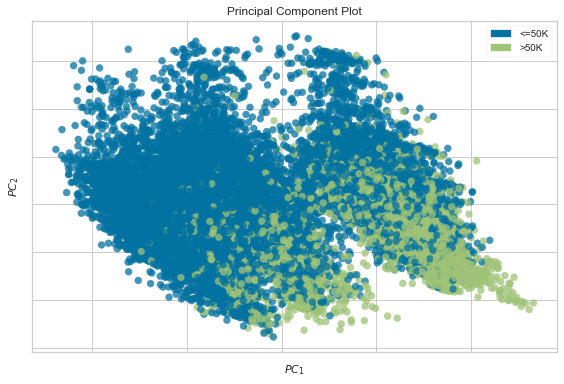

In [231]:
#tough to visualize a 100 features, let's do some principal omponen analysis to decompose the features into fewer 
#dimensions
from yellowbrick.features import PCA

classes = ["<=50K", ">50K"]

visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(features, target)
visualizer.show()
#based on this diagram, the decision boundary looks curved with an upwards hump,
#Logistic Regression or polynomail regression with degree 2 could be good here

In [20]:
#lets split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [21]:
#preprocessing featurs so loss functions can converge faster
from sklearn.preprocessing import MinMaxScaler

trainscaler = MinMaxScaler().fit(X_train)
X_train = trainscaler.transform(X_train)
testscaler = MinMaxScaler().fit(X_test)
X_test = trainscaler.transform(X_test)

In [22]:
#only two discrete target variables, this is a classification problem
from sklearn.linear_model import LogisticRegression

#lets try logistic regression
logreg = LogisticRegression().fit(X_train, y_train)

/Users/vaibhavguglani/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
#prediction and accuracy
ypred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.8525394510011934

In [186]:
#failed to converge lets try using a different solver
logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
#prediction and accuracy
ypred = logreg.predict(X_test)


accuracy_score(y_test, ypred)
#0.85% accuracy still
#maybe using different penalty may improve performance

0.8522742341864474

In [184]:
logreg = LogisticRegression(penalty="l1", solver="liblinear").fit(X_train, y_train)
#prediction and accuracy
ypred = logreg.predict(X_test)


accuracy_score(y_test, ypred)
#slightly better with l1 penalty 0.855 vs 0.852, lasso is eliminating some variables it deems unecessary

0.8553242275560271

In [26]:
print(len(target[target==0]))
print(len(target[target==1]))
#high sccuracydoesnt necessarily mean its an amazing model, dataset is unbalanced with there being much more people
#making less than or equal to 50K, lets check out ROC curve

22654
7508


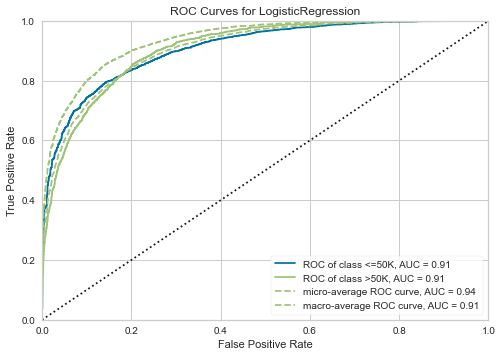

In [180]:
from yellowbrick.classifier import ClassificationScoreVisualizer


  
from yellowbrick.classifier import ROCAUC



visualizer = ROCAUC(logreg, classes=["<=50K", ">50K"])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()    

#the high AUC scores suggest that the model is good at distinguishing between the two classes and the dataset imbalance 
#is not having a negative impact on it

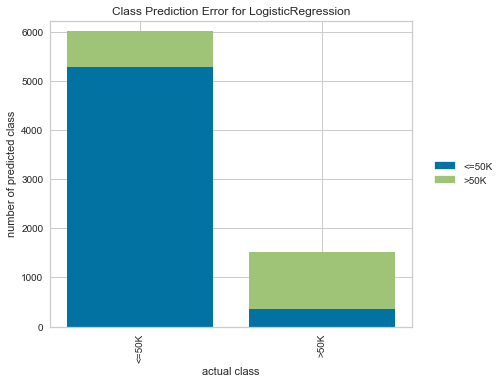

In [182]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(
    logreg, classes=["<=50K", ">50K"]
)


visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)


visualizer.show()
#based on this visualization, it seems that the model is better at classifying people making less than 50K
#this is because a significantly larger number of people are making less than 50K and this is evident in the 
#class imbalance

In [27]:
#we can also try a linear regression model that can output 1 or 0 depending on what the predicted value is closer to
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
ypred = linreg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, ypred)

#very low r2 score but maybe rounding to closest value could change results

0.3746103080112907

In [28]:
#rounds each result
ypred_class = [i.round() for i in ypred]
#now lets check accuracy
accuracy_score(y_test, ypred_class)
#pretty accurate but slightly worse than logistic regression, we can potentially try polynomial regression

0.8408699111523671

In [187]:
from sklearn.preprocessing import PolynomialFeatures
#polynomial could overfit so lets use Ridge regularization
from sklearn.linear_model import Ridge
#lets try degree 2
poly = PolynomialFeatures(2)
degree2 = poly.fit_transform(X_train)

degree2_reg = Ridge().fit(degree2, y_train)
ypred = degree2_reg.predict(PolynomialFeatures(2).fit_transform(X_test))
ypred_class =  [i.round() for i in ypred]
accuracy_score(y_test, ypred_class)
#looks like this is slightly better than Logistic by a very small amount

0.8558546611855191

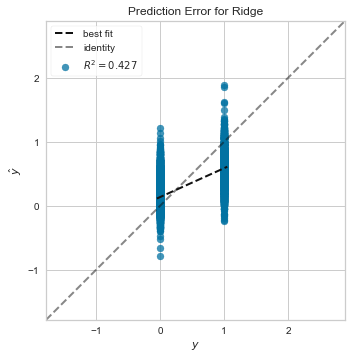

In [192]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(degree2_reg, hist=False)
visualizer.fit(degree2, y_train)
visualizer.score(PolynomialFeatures(2).fit_transform(X_test), y_test)
visualizer.show()
#the prediction error here does not really mean much, and accuracy is the better metric to use, as this is
#a classification problem, not a regression problem

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
ypred = knn.predict(X_test)
accuracy_score(y_test, ypred)
#by default uses only 5 neighbors, b a good amount of neighbors to use is equal to square root of datapoints

0.8228351677496353

In [193]:
neighbors = int(np.sqrt(len(X_train)))

knn = KNeighborsClassifier(n_neighbors=neighbors).fit(X_train, y_train)
ypred = knn.predict(X_test)
accuracy_score(y_test, ypred)

0.8311894974141361

In [194]:
#wont ty naive bayes as there is a mix of categorical and non categorical data, may not work here
#can try decision tree, as better suited for such data
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier().fit(X_train, y_train)
ypred = dectree.predict(X_test)
accuracy_score(y_test, ypred)
#base decision tree not as good as Logistic Regression, may be worth tuning different parameters, could be overfitted

0.8158069221588649

In [195]:
ypredtrain = dectree.predict(X_train)
accuracy_score(y_train, ypredtrain)
#as suspected, heavily overfit with training accuracy of 100% lets mess around with depth

1.0

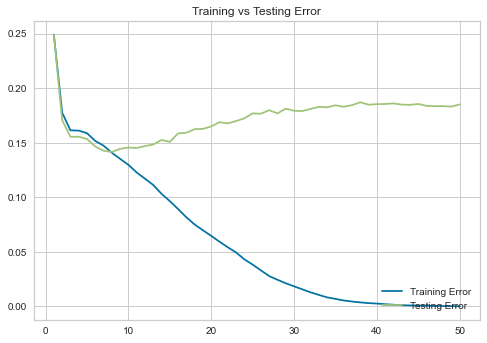

In [196]:
#current tree depth
max_depth = dectree.get_depth()
#lets try all possible depth until 50 to see what gives us the best accuracy
training_errors = []
testing_errors = []
depth = [i for i in range(1, 51)]
for i in range(1, 51):
    tree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    training_error = 1 - accuracy_score(y_train, train_pred)
    testing_error = 1 - accuracy_score(y_test, test_pred)
    training_errors.append(training_error)
    testing_errors.append(testing_error)
import matplotlib.pyplot as plt

plt.title('Training vs Testing Error')
plt.plot(depth, training_errors, 'b', label = 'Training Error')
plt.plot(depth, testing_errors, 'g', label = 'Testing Error')
plt.legend(loc = 'lower right')
plt.show()

In [197]:
#looks like testing error is at its lowest with a much shorter depth lets find it
#depth that minimizes error
for i in range(1, 51):
    if testing_errors[i - 1] == min(testing_errors):
        print(i)

8


In [203]:
#lets check accuracy with tree of depth 8
dectree = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
ypred = dectree.predict(X_test)
accuracy_score(y_test, ypred)
#now the tree is slightly better than logistic regression

0.8585068293329797

In [40]:
#let us try support vector machines
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)

#svc is worse right now but lets try some other hyperparameters

0.8378199177827874

In [41]:
#it is a radial kernel by default, lets try linear
svc = SVC(kernel="linear").fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)
#performs better with linear, lets also try polynomial

0.8517438005569553

In [42]:
svc = SVC(kernel="poly", degree=2).fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)
#degree 2 slightly worse lets try 3

0.8415329531892322

In [43]:
svc = SVC(kernel="poly", degree=3).fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)
#this is even worse, lets work more with the linear kernel and give it a larger error budget on training data

0.8402068691155019

In [44]:
svc = SVC(kernel="linear", C=10).fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)
#slightly better lets increase error budget further

0.8542633602970429

In [45]:
svc = SVC(kernel="linear", C=100).fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)
#seems that best svm has a linear kernel with error budget 10

0.8541307518896698

In [46]:
#lets try some ensemble models, starting with random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
ypred = rf.predict(X_test)
accuracy_score(y_test, ypred)
#since the decision tree on its own with no tuning was overfit, lets try using a shorter max depth on random forests to
#see if it makes the performance better

0.8538655350749238

In [47]:
#lets try all possible depth until 50 to see what gives us the best accuracy
training_errors = []
testing_errors = []
depth = [i for i in range(1, 51)]
for i in range(1, 51):
    trees = RandomForestClassifier(max_depth=i).fit(X_train, y_train)
    train_pred = trees.predict(X_train)
    test_pred = trees.predict(X_test)
    training_error = 1 - accuracy_score(y_train, train_pred)
    testing_error = 1 - accuracy_score(y_test, test_pred)
    training_errors.append(training_error)
    testing_errors.append(testing_error)
for i in range(1, 51):
    if testing_errors[i - 1] == min(testing_errors):
        print(i)

21


In [51]:
#looks like best depth is 18 lets try this new random forest now
rf = RandomForestClassifier(max_depth=21).fit(X_train, y_train)
ypred = rf.predict(X_test)
accuracy_score(y_test, ypred)
#best model so far with 86% accuracy

0.8635459488131547

In [49]:
#lets try a boosting classifier as well
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier().fit(X_train, y_train)
ypred = adaclf.predict(X_test)
accuracy_score(y_test, ypred)
#not as good as random forest so far but pretty close, lets try increasing number of estimatorsd in ensemble

0.8618220395173054

In [50]:
#default estimators are 50, now there are 500
adaclf = AdaBoostClassifier(n_estimators=500).fit(X_train, y_train)
ypred = adaclf.predict(X_test)
accuracy_score(y_test, ypred)
#increasing the number of estimators has improved the model, and its better than random forest

0.8722981036997746

In [53]:
#lets try xgboost, most popular algorithm for structured data on Kaggle
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)
ypred = xgb.predict(X_test)
accuracy_score(y_test, ypred)

0.8732263625513857

In [57]:
#lets try the algorithm with a linear booster instead, as the model had good results with linear models
xgb = XGBClassifier().fit(X_train, y_train)
ypred = xgb.predict(X_train)
accuracy_score(y_train, ypred)
#it is slightly overfitted, lets try changing some parameters

0.9045577118606605

In [200]:
xgb = XGBClassifier(max_depth=4, tree_method='hist', eta=0.25).fit(X_train, y_train)
ypred = xgb.predict(X_test)
accuracy_score(y_test, ypred)
#best model so far

0.8762763559209654

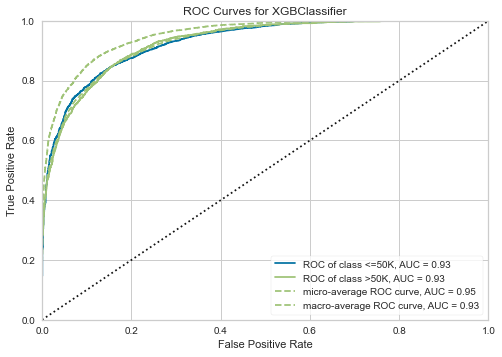

In [202]:
visualizer = ROCAUC(xgb, classes=["<=50K", ">50K"])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show() 
#aisde from an increase in accuracy, compared to Logistic regression, XGBoost is better at class separation, 
#as tree based methods are better for imbalanced datasets

In [136]:
#now that we have an idea of what models work well, lets do some feature elimination to see if the model improves
#will try this for XGboost and Logistic Regression
#since logistic regression is just a linear relationship with a sigmoid, we can analyze pearson correlation, to
#eliminate irrelevant features
categorical_salary = features.copy()
categorical_salary["income"] = target
corr_df = pd.DataFrame(categorical_salary.corr()['income'][:])
corr_df = corr_df.sort_values(by='income', ascending=False)
#lets use top 10 positive and negative correlated features
top10pos = corr_df.iloc[:31, :]
top10neg = corr_df.iloc[95:, :]

In [137]:
#lets use all features with an absolute value correlation of 0.01 or higher
poscor = corr_df[corr_df["income"] >= 0.01]
negcor = corr_df[corr_df["income"] <= -0.01]

In [138]:
poscor

,income
income,1.000000
marital_Married-civ-spouse,0.445418
relationship_Husband,0.401236
education_num,0.335286
age,0.241998
hr_per_week,0.229480
capital_gain,0.221196
sex_Male,0.216699
occupation_Exec-managerial,0.213442
occupation_Prof-specialty,0.181458


In [139]:
negcor

,income
country_Portugal,-0.010199
employer_Without-pay,-0.012406
country_Outlying-US(Guam-USVI-etc),-0.012406
country_Haiti,-0.013272
country_Peru,-0.013300
country_Nicaragua,-0.014414
country_Jamaica,-0.014780
country_Vietnam,-0.018215
country_Puerto-Rico,-0.019337
country_El-Salvador,-0.021198


In [140]:
#we notice that country of employment is a very prevalent feature which makes sense as countries like the US have
#a higher rate of pay compared to others, it also seems that occupation at a manegerial level, or having a 
#speciality is linked to higher pay.
#its a given and visible here that amount of education and degree level is positively correlated too, and there
#are apparent race issues clearly visible with race white having the highest postive correlation to income
#also hrs_per_week is postively correalted, reaffirming that a lot of higher paying jobs have longer hours
#it also seems thhat marriage is linked to high pay, probably because a lot of people marry afterv they have 
#settled down well into their careers, age is similar too

In [141]:
new_feature_list = []
for i in list(poscor.index)[1:]:
    new_feature_list.append(i)
for i in list(negcor.index):
    new_feature_list.append(i)

In [142]:
new_df = pd.DataFrame()
for c in new_feature_list:
    new_df[c] = features[c]
new_df

,marital_Married-civ-spouse,relationship_Husband,education_num,age,hr_per_week,capital_gain,sex_Male,occupation_Exec-managerial,occupation_Prof-specialty,education_Bachelors,...,occupation_Adm-clerical,employer_Private,marital_Divorced,education_HS-grad,relationship_Unmarried,occupation_Other-service,relationship_Not-in-family,sex_Female,relationship_Own-child,marital_Never-married
0,0,0,13,39,40,2174,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,1,1,13,50,13,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9,38,40,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0,0
3,1,1,7,53,40,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,13,28,40,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,12,27,38,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
32557,1,1,9,40,40,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
32558,0,0,9,58,40,0,0,0,0,0,...,1,1,0,1,1,0,0,1,0,0
32559,0,0,9,22,20,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,1


In [143]:
#lets resplit this data, and preprocess it
X_trainc, X_testc, y_trainc, y_testc = train_test_split(new_df, target, test_size=0.25, random_state=42)
trainscaler = MinMaxScaler().fit(X_trainc)
X_trainc = trainscaler.transform(X_trainc)
testscaler = MinMaxScaler().fit(X_testc)
X_testc = trainscaler.transform(X_testc)

In [207]:
#logistic regression
logreg = LogisticRegression(penalty="l1", solver="liblinear").fit(X_trainc, y_trainc)
ypred = logreg.predict(X_testc)
accuracy_score(y_testc, ypred)
#looks like logistic regression isnt better with these selected features, lets try the polynomial regression from before
#instead

0.855191619148654

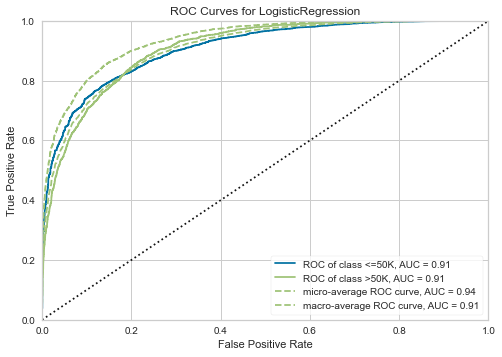

In [208]:
visualizer = ROCAUC(logreg, classes=["<=50K", ">50K"])

visualizer.fit(X_trainc, y_trainc)        
visualizer.score(X_testc, y_testc)        
visualizer.show() 
#AUC hasnt changed from initial logistic regression AUC, might as well use all the features

In [206]:
poly = PolynomialFeatures(2)
degree2 = poly.fit_transform(X_trainc)

degree2_reg = Ridge().fit(degree2, y_trainc)
ypred = degree2_reg.predict(PolynomialFeatures(2).fit_transform(X_testc))
ypred_class =  [i.round() for i in ypred]
accuracy_score(y_testc, ypred_class)
#in this case logistic regression is better, maybe an algorithmic approach to eature selection could be better

0.8541307518896698

In [209]:
#tires all possible combinations of features on our best XGboost model
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
#using 50 top features
def RFE_feature_selection(n):
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = n)
    
    #fit the RFE selector to the training data
    select.fit(X_train, y_train)

    #transform training and testing sets so only the selected features are retained
    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)

    model = xgclf = XGBClassifier(max_depth=4, tree_method='hist', eta=0.25).fit(X=X_train_selected, y=y_train)
    
    accuracy = model.score(X_test_selected, y_test)
    
    #print("Selected features after RFE:")
    #for i in range(0, len(select.get_support())):
     #   if select.get_support()[i] == True:
      #      print("\t" + str(features.columns[i]))
    
    #print("Logistic Regression performance with selected features:")
    #print(accuracy)
    return accuracy, xgclf

#lets try up to 105 features and see what selection gives us the best performance
accuracies = []
models = []
for i in range(1, 105):
    accuracy, model = RFE_feature_selection(i)
    accuracies.append(accuracy)
    models.append(model)

In [210]:
#lets find the features in the amx accuracy xgboost
np.array(accuracies).max()

0.8765415727357114

In [211]:
for i in range(1, 105):
    if accuracies[i - 1] == max(accuracies):
        print(i)

93
94
95


In [220]:
#looks like highest accuracy is with 93 features, lets find these features
def RFE_feature_selection():
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 93)
    
    #fit the RFE selector to the training data
    select.fit(X_train, y_train)

    #transform training and testing sets so only the selected features are retained
    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)

    model = adaclf = XGBClassifier(max_depth=4, tree_method='hist', eta=0.25).fit(X=X_train_selected, y=y_train)
    
    accuracy = model.score(X_test_selected, y_test)
    
    print("Selected features after RFE:")
    for i in range(0, len(select.get_support())):
        if select.get_support()[i] == True:
            print("\t" + str(features.columns[i]))
    
    return accuracy, X_train_selected, X_test_selected
a, xtr, xtst = RFE_feature_selection()

Selected features after RFE:
	age
	fnlwgt
	education_num
	capital_gain
	capital_loss
	hr_per_week
	employer_Federal-gov
	employer_Local-gov
	employer_Private
	employer_Self-emp-inc
	employer_Self-emp-not-inc
	employer_State-gov
	education_10th
	education_11th
	education_12th
	education_5th-6th
	education_7th-8th
	education_9th
	education_Assoc-acdm
	education_Assoc-voc
	education_Bachelors
	education_Doctorate
	education_HS-grad
	education_Masters
	education_Preschool
	education_Prof-school
	education_Some-college
	marital_Divorced
	marital_Married-AF-spouse
	marital_Married-civ-spouse
	marital_Married-spouse-absent
	marital_Never-married
	marital_Separated
	marital_Widowed
	occupation_Adm-clerical
	occupation_Craft-repair
	occupation_Exec-managerial
	occupation_Farming-fishing
	occupation_Handlers-cleaners
	occupation_Machine-op-inspct
	occupation_Other-service
	occupation_Priv-house-serv
	occupation_Prof-specialty
	occupation_Protective-serv
	occupation_Sales
	occupation_Tech-support

In [ ]:
#based on this algorithmic eliminaton, the most important feature seems to be age, fnlwgt (unsure what this is), 
#capitak gain/loss (maybe indicating profitbaility of the eomployer in relationship with higher pay, makes sense as 
#a lot of companies withh high stock market values like Apple tend to pay more), hours per week, type of employer
#(which makes sense as the private sector will usually pay more than the government), followed by education level and 
#years (indicating income relationship with skillset, and specialization), followed by marital status (maybe data 
#consists of household income, even if it doesn't, it could indicate the tendency of marrying after making some progress
#with a person's career), followed by occupation (maybe if data was more specific with type of occupation, there
#would be a stronger relationship), followed by race and sex (indicating racial and gender based discrimination in jobs)
#and lastly has countries, which makes sense as first world countries have significantly higher salaries and GDP
#per capita
#Also, should consider that teh algorithm performed best with all these features, so all these features are very important